In [14]:
from sklearnex import patch_sklearn
patch_sklearn()

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import (
    silhouette_score
)

from utils import get_data

# sns.set_theme(rc={'figure.figsize':(11.7,8.27)})

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [15]:
X, y, metadata, variables = get_data('wine_quality')

In [16]:
y.value_counts(normalize=True)

quality
6          0.436509
5          0.329075
7          0.166077
4          0.033246
8          0.029706
3          0.004618
9          0.000770
Name: proportion, dtype: float64

In [17]:
# Split data into train and test sets.
# We use Stratifield sampling to ensure that the distribution of the data is maintained across the sample.
# Use stratified kfold cross validation to ensure that the model is not overfitting the data

TEST_SIZE = 0.2
RANDOM_STATE = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=y)

# Train the KMeans

In [18]:
RANDOM_STATE = 42
N_JOBS = -1
VERBOSE = 4

scaler = StandardScaler()
# For KMeans use the default algo and max_iterations
clus = KMeans(n_jobs=N_JOBS, n_init=100, random_state=RANDOM_STATE)
clus_pipeline = Pipeline(steps=[
    ('scaler', scaler),
    ('model', clus)
])


In [19]:
results = {}
for n_clusters in range(2, 20):
    print(f"---------- n_clusters: {n_clusters} ----------")
    clus_pipeline.set_params(model__n_clusters=n_clusters)
    clus_pipeline.fit(X_train)
    
    clus_labels = clus_pipeline.named_steps['model'].labels_
    sil_score = silhouette_score(X_train, clus_labels)
    
    results[n_clusters] = {'inertia': clus_pipeline.named_steps['model'].inertia_,
                           'sil_score': sil_score}

---------- n_clusters: 2 ----------


---------- n_clusters: 3 ----------
---------- n_clusters: 4 ----------
---------- n_clusters: 5 ----------
---------- n_clusters: 6 ----------
---------- n_clusters: 7 ----------
---------- n_clusters: 8 ----------
---------- n_clusters: 9 ----------
---------- n_clusters: 10 ----------
---------- n_clusters: 11 ----------
---------- n_clusters: 12 ----------
---------- n_clusters: 13 ----------
---------- n_clusters: 14 ----------
---------- n_clusters: 15 ----------
---------- n_clusters: 16 ----------
---------- n_clusters: 17 ----------
---------- n_clusters: 18 ----------
---------- n_clusters: 19 ----------


<Axes: title={'center': 'Kmeans Elbow plot - Wine Quality'}, xlabel='n_clusters'>

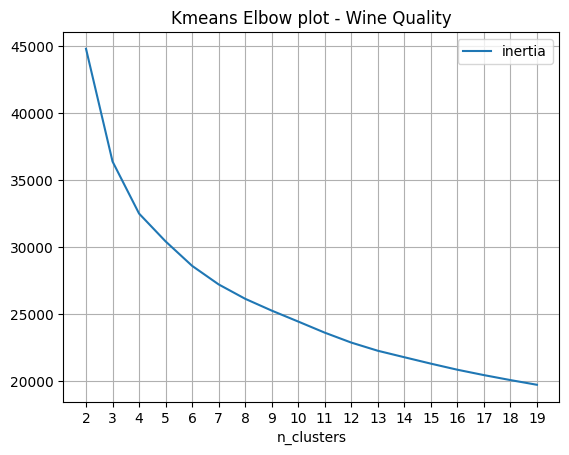

In [20]:
results_df = pd.DataFrame.from_dict(results, orient='index').reset_index()
results_df.columns = ['n_clusters', 'inertia', 'sil_score']
results_df.plot(x='n_clusters', y='inertia',title='Kmeans Elbow plot - Wine Quality', xticks=results_df['n_clusters'], grid=True)

<Axes: title={'center': 'Kmeans Silhoutte Score - Wine Qaulity'}, xlabel='n_clusters'>

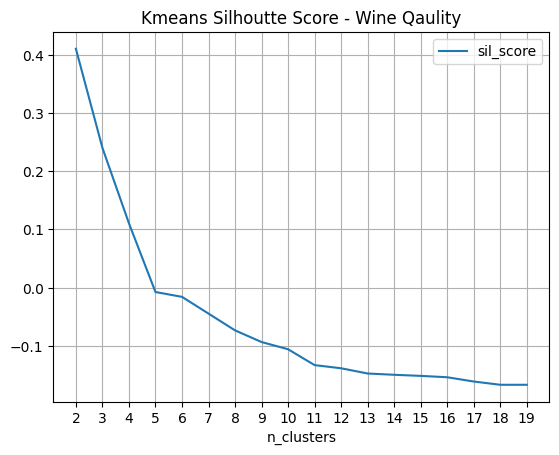

In [21]:
results_df.plot(x='n_clusters', y='sil_score',title='Kmeans Silhoutte Score - Wine Qaulity', xticks=results_df['n_clusters'], grid=True)

In [22]:
clus_pipeline.set_params(model__n_clusters=3)
label = clus_pipeline.fit_predict(X_train)
print(label.shape)

centroids = clus_pipeline.named_steps['model'].cluster_centers_

(5197,)


In [23]:
X_std = StandardScaler().fit_transform(X_train)
X_std

array([[-0.8715968 , -1.02564121,  0.6953355 , ..., -2.17021899,
        -0.4206092 , -0.82057522],
       [-0.24953102, -0.78430704, -0.53370718, ..., -0.42777889,
        -0.48874841,  1.53483054],
       [-0.63832213, -0.48263932,  0.76361565, ..., -0.86338891,
        -1.03386213, -1.32530502],
       ...,
       [-0.40504747, -0.90497412,  0.01253401, ..., -1.98352897,
         0.26078295,  0.02064112],
       [-0.63832213, -0.54297286,  2.88030027, ..., -0.05439887,
        -0.76130527, -1.07294012],
       [-0.1717728 , -0.60330641,  1.03673625, ..., -0.17885887,
        -0.55688763,  0.44124929]])

In [24]:
X.columns


Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

Text(0, 0.5, 'volatile_acidity')

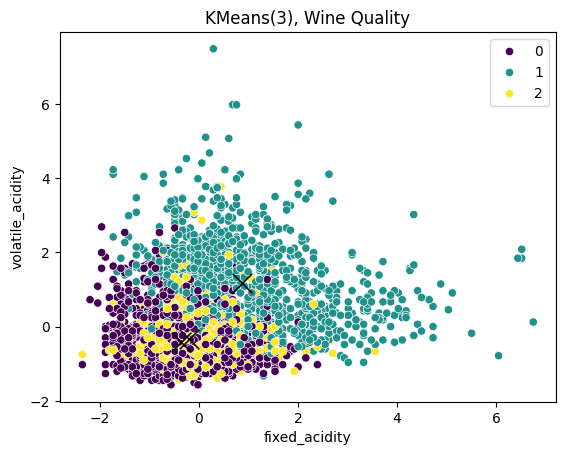

In [25]:
fig, ax = plt.subplots()
sns.scatterplot(x=X_std[:,0], y=X_std[:,1], hue=label, palette='viridis', ax=ax)
sns.scatterplot(x=centroids[:,0], y=centroids[:,1], color='black', s=200, marker='x', ax=ax)
ax.set_title("KMeans(3), Wine Quality")
ax.set_xlabel("fixed_acidity")
ax.set_ylabel("volatile_acidity")

In [26]:
from itertools import combinations
combs = list(combinations(range(0, X_train.shape[1]), 2))
len(combs)

55

In [33]:
y_train.values[:, 0]

array([5, 7, 5, ..., 7, 6, 6], dtype=int64)

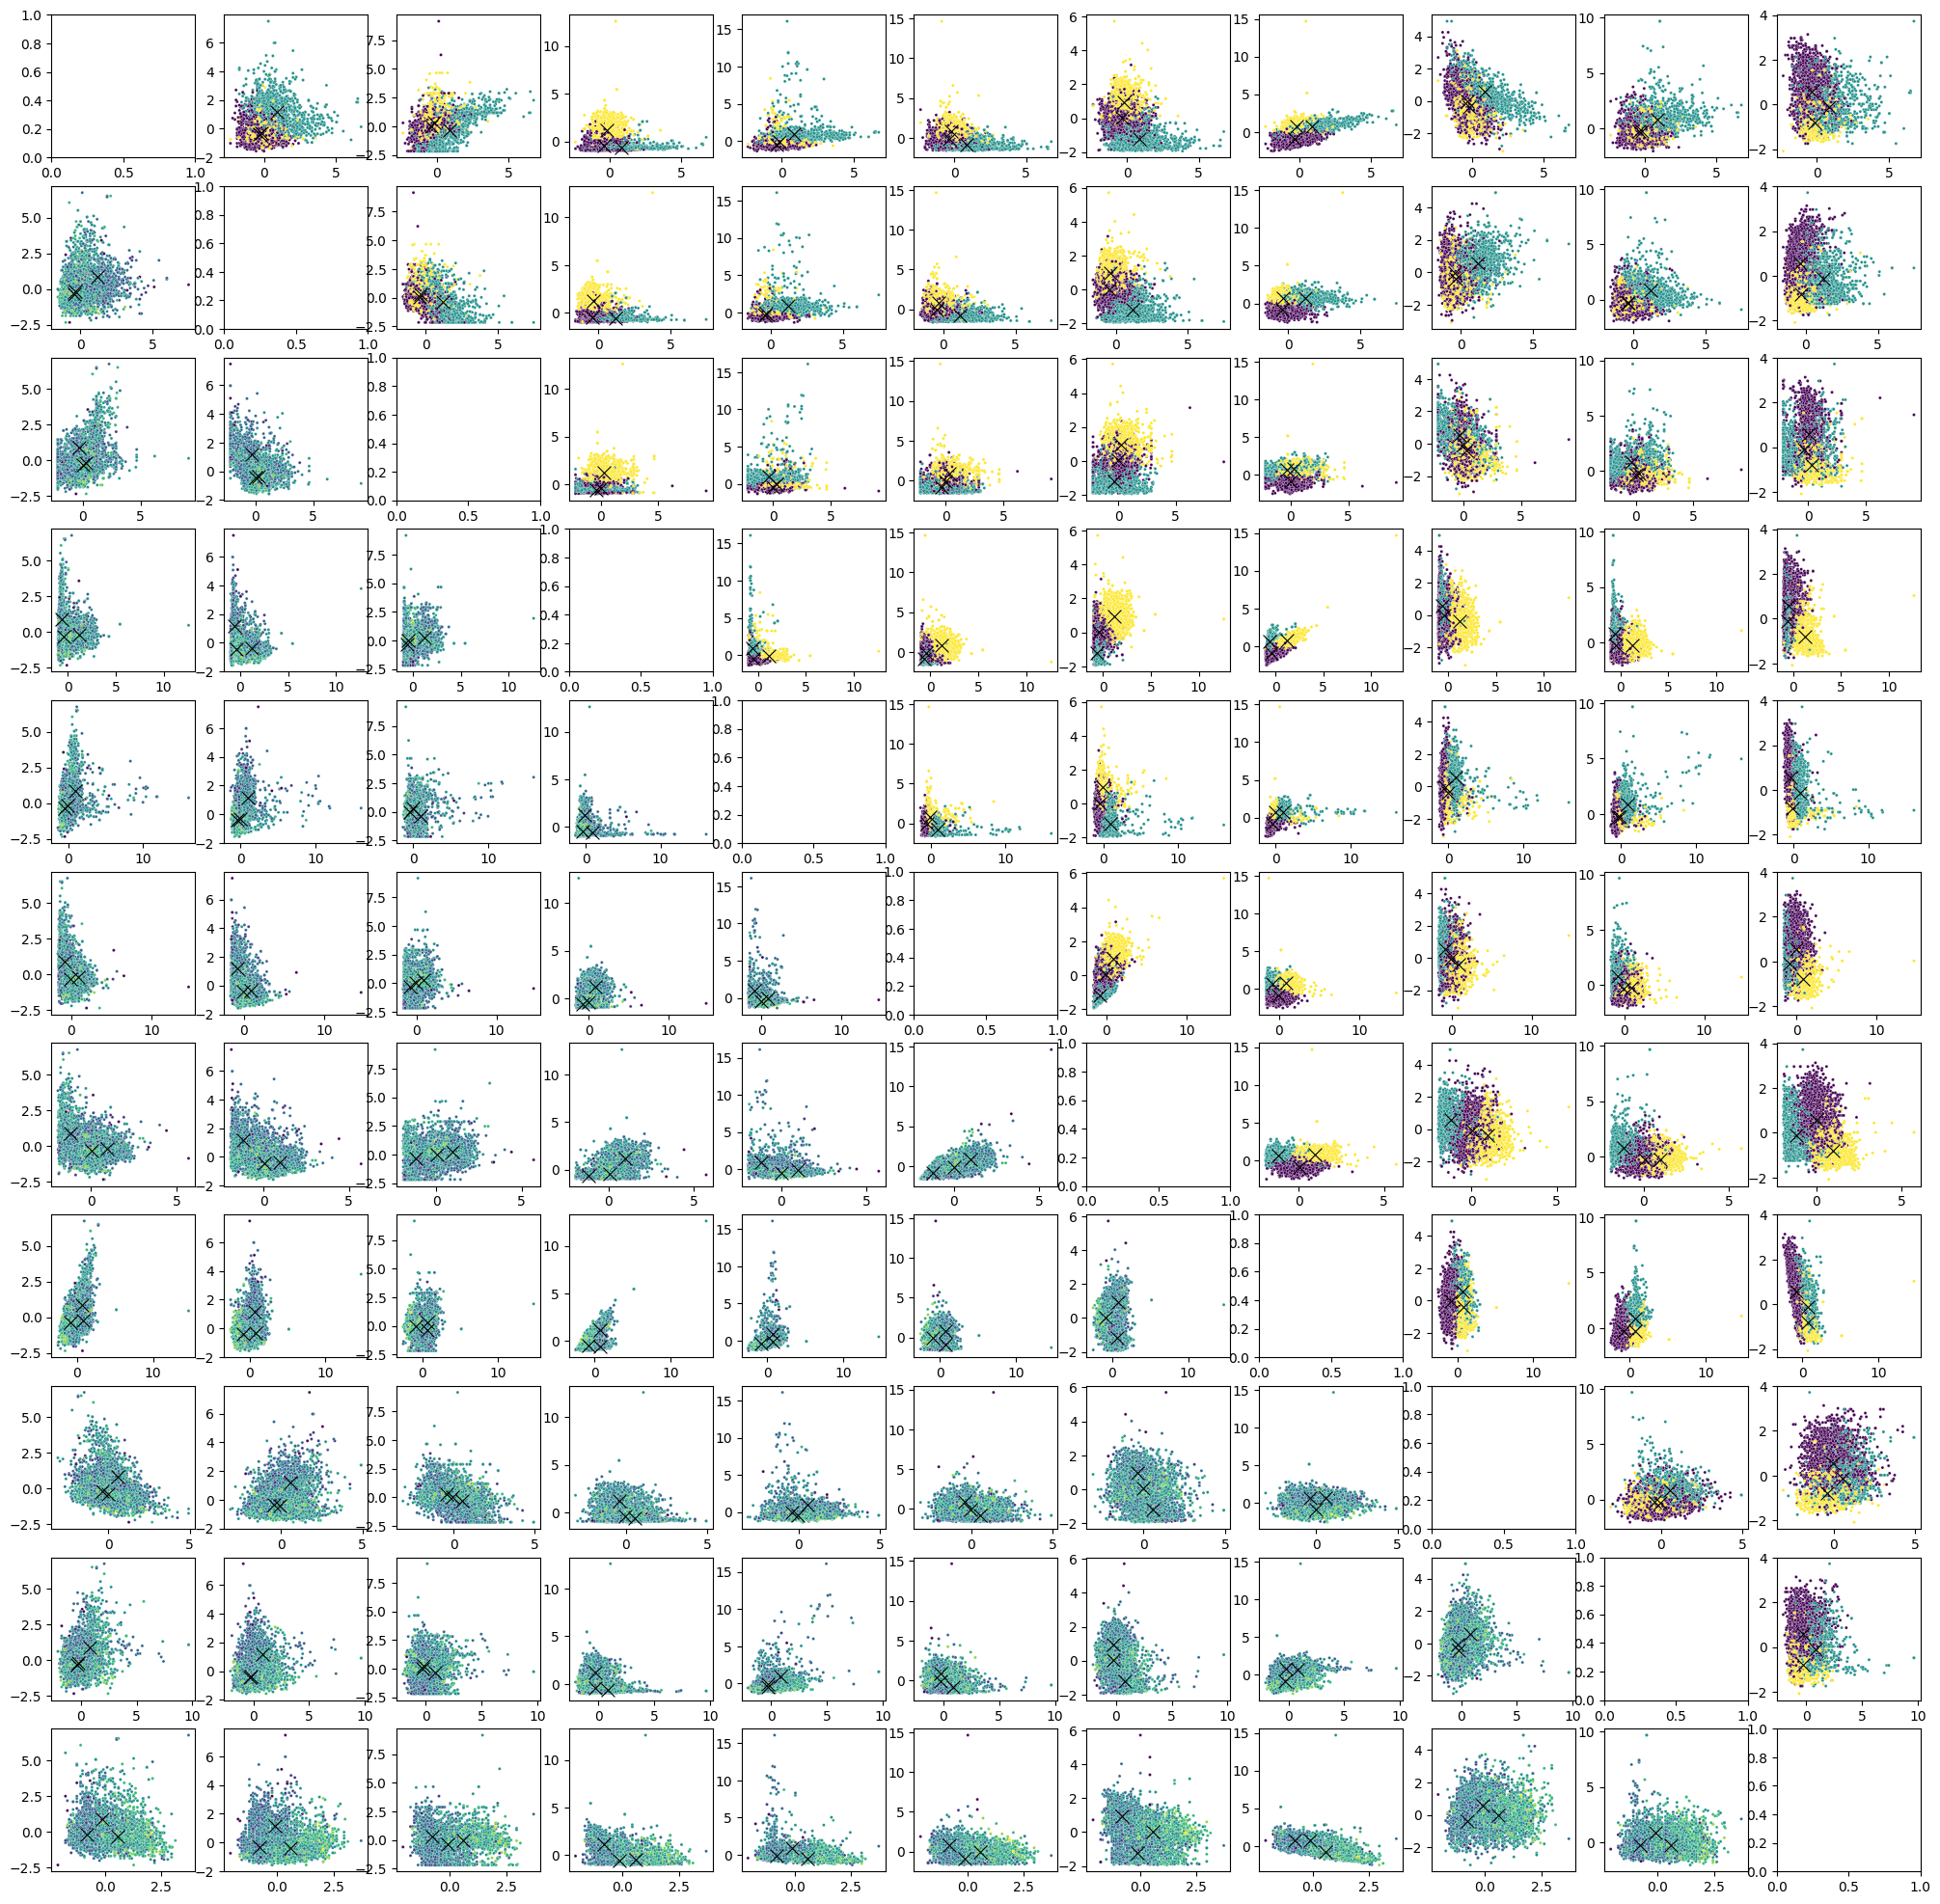

In [35]:
fig, ax = plt.subplots(X_train.shape[1], X_train.shape[1], figsize=(25, 25))
for i, j in combs:
    
    sns.scatterplot(x=X_std[:,i], y=X_std[:,j], hue=label, palette='viridis', ax=ax[i, j], legend=False, s=5)
    sns.scatterplot(x=centroids[:,i], y=centroids[:,j], color='black', s=100, marker='x', ax=ax[i, j])
    # ax[i, j].set_title(f"KMeans(3), Dry Beans")
    # ax[i, j].set_xlabel(X_train.columns[i])
    # ax[i, j].set_ylabel(X_train.columns[j])

    sns.scatterplot(x=X_std[:,j], y=X_std[:,i], hue=y_train.values[:, 0], palette='viridis', ax=ax[j, i], legend=False, s=5)
    sns.scatterplot(x=centroids[:,j], y=centroids[:,i], color='black', s=100, marker='x', ax=ax[j, i])
    # ax[j, i].set_title(f"KMeans(3), Dry Beans")
    # ax[j, i].set_xlabel(X_train.columns[j])
    # ax[j, i].set_ylabel(X_train.columns[i])